<a href="https://colab.research.google.com/github/Sergeypis/Home_download/blob/master/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_4_%D0%A4%D0%BE%D1%80%D0%BC%D1%8B%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обзор HTTP-методов и их использование в Django
HTTP-методы определяют тип операции, которую вы хотите выполнить с ресурсом. В Django, как и в веб-разработке в целом, наиболее часто используются следующие методы:

**GET**: Используется для запроса данных с сервера. Отправляемые данные кодируются в URL.

**POST**: Используется для отправки данных на сервер. Данные отправляются в теле запроса и не видны в URL.

**PUT**: Обычно используется для обновления ресурса на сервере.

**DELETE**: Используется для удаления ресурса на сервере.

**PATCH**: Применяется для частичного обновления ресурса.

**HEAD**: Похож на GET, но возвращает только заголовки без тела.

**OPTIONS**: Используется для описания параметров связи с ресурсом.

## **Различие между GET и POST запросами**

**GET-запросы** предназначены для получения данных. Они могут быть кэшированы, оставаться в истории браузера, и могут быть добавлены в закладки. Параметры GET-запроса видны в URL.

**POST-запросы** используются для отправки данных на сервер, например, при заполнении форм. Они не кэшируются, не остаются в истории браузера и не могут быть сохранены в закладках. Данные в POST-запросах находятся в теле запроса и не видны в URL.

## **Чтение данных POST-запроса во view-функциях**

В Django для работы с POST-запросами часто используются view-функции. Вот пример того, как можно обработать POST-запрос и прочитать отправленные данные:

```python
from django.http import HttpResponse


def my_view(request):
    if request.method == 'POST':
        # Получаем данные из POST-запроса
        received_data = request.POST

        # Данные доступны как словарь
        some_value = received_data.get('some_key', 'default_value')

        return HttpResponse(f"Полученное значение: {some_value}")
```

Аналогично, но с декоратором

```python
from django.http import HttpResponse
from django.views.decorators.http import require_http_methods

@require_http_methods(["POST"])
def my_view(request):
    # Получаем данные из POST-запроса
    received_data = request.POST

    # Данные доступны как словарь
    some_value = received_data.get('some_key', 'default_value')

    return HttpResponse(f"Полученное значение: {some_value}")
```

Здесь **require_http_methods** указывает, что функция должна принимать только POST-запросы.

**request.POST** - это словарь, содержащий все данные, отправленные в POST-запросе. Метод **get** используется для извлечения конкретных значений, предоставляя возможность указать значение по умолчанию, если ключ отсутствует.

Для работы с формами в Django также предоставляются более высокоуровневые абстракции, такие как классы **Form** и **ModelForm**, которые автоматизируют процесс проверки и очистки данных формы.

## **Формы**



### *Примеры форм*

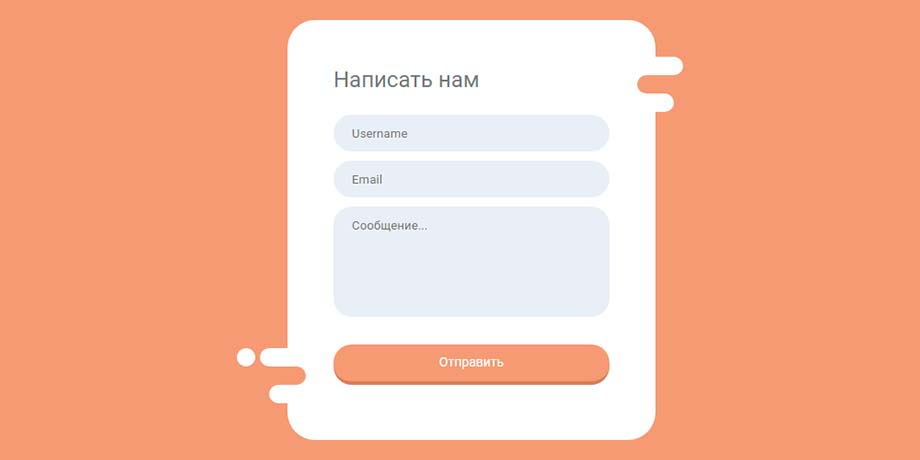

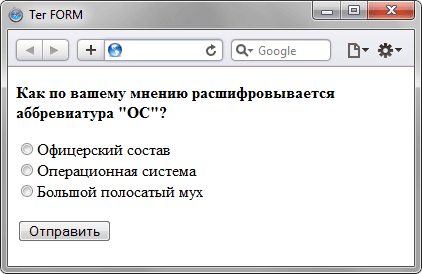

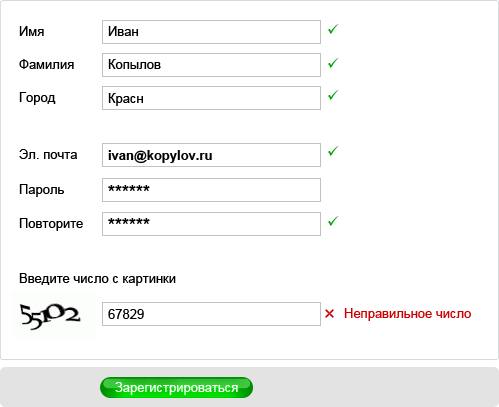

### *Формы с точки зрения HTML*

В HTML форма - это набор элементов внутри \<form\>...\</form\>, которые позволяют посетителю выполнять такие действия, как ввод текста, выбор опций, манипулирование объектами или элементами управления и так далее, а затем отправлять эту информацию обратно на сервер.

Помимо элементов \<input\>, форма должна содержать два элемента:

* **where**: URL, по которому должны быть возвращены данные, соответствующие введенным пользователем
* **how**: метод HTTP, с помощью которого должны быть возвращены данные

```html
<form action="/your-name/" method="post">
    <label for="your_name">Your name: </label>
    <input id="your_name" type="text" name="your_name" value="{{ current_name }}">
    <input type="submit" value="OK">
</form>
```

В качестве примера, форма входа для администратора Django содержит несколько элементов \<input\><input>: один из **type**="text" для имени пользователя, один из **type**="password" для пароля и один из **type**="submit" для кнопки «Войти».

Он также содержит некоторые скрытые текстовые поля, которые пользователь не видит, и которые Django использует для определения того, что делать дальше.

Он также сообщает браузеру, что данные формы должны быть отправлены на URL, указанный в атрибуте \<form\>“action - /admin/ - и что они должны быть отправлены с использованием механизма HTTP, указанного в атрибуте method - post.

Когда срабатывает элемент \<input type="submit" value="Log in"\> <input type="submit" value="Log in">, данные возвращаются в /admin/.

**GET** и **POST** - единственные методы HTTP, которые следует использовать при работе с формами.

## **Формы в Django**

Подробнее https://django.fun/ru/docs/django/4.1/topics/forms/

Django обрабатывает три различные части работы, связанной с формами:

* подготовка и реструктуризация данных, чтобы сделать их готовыми к визуализации
* создание HTML-форм для данных
* получение и обработка представленных форм и данных от клиента

Можно написать код, который будет делать все это вручную, но Django может позаботиться обо всем этом за вас.

### **Создание формы**

Предположим, вы хотите создать простую форму на своем сайте, чтобы получить имя пользователя. Вам понадобится что-то подобное в вашем шаблоне:

```html
<form action="/your-name/" method="post">
    <label for="your_name">Your name: </label>
    <input id="your_name" type="text" name="your_name" value="{{ current_name }}">
    <input type="submit" value="OK">
</form>
```

Это указывает браузеру вернуть данные формы в URL /your-name/, используя метод POST. Он отобразит текстовое поле с надписью «Ваше имя:» и кнопку с надписью «OK». Если контекст шаблона содержит переменную current_name, она будет использована для предварительного заполнения поля your_name.

Тоже самое можно сделать через конструктор форм Django

```python
# forms.py
from django import forms

class NameForm(forms.Form):
    your_name = forms.CharField(label='Your name', max_length=100)
```

Определяется класс **Form** с одним полем (**your_name**).

Мы применили к полю удобную для человека метку, которая появится в \<label\> при его отображении (хотя в данном случае указанная нами метка **label** фактически является той же самой, которая была бы сгенерирована автоматически, если бы мы ее опустили).

Максимально допустимая длина поля определяется **max_length**. Это делает две вещи. Она накладывает **maxlength**="100" на HTML \<input\> (таким образом, браузер должен предотвратить ввод пользователем более чем этого количества символов).

Это также означает, что когда Django получит форму обратно от браузера, он проверит длину данных.

Экземпляр **Form** имеет метод **is_valid()**, который запускает процедуры валидации для всех его полей. При вызове этого метода, если все поля содержат достоверные данные, он будет:

* возвращать True
* поместит данные формы в ее атрибут **cleaned_data**.

Вся форма при первом отображении будет выглядеть следующим образом:

```html
<label for="your_name">Your name: </label>
<input id="your_name" type="text" name="your_name" maxlength="100" required>
```
<label for="your_name">Your name: </label>
<input id="your_name" type="text" name="your_name" maxlength="100" required>


### **Использование формы в представлении**

Данные формы, отправленные обратно на сайт Django, обрабатываются представлением, обычно тем же представлением, которое опубликовало форму. Это позволяет нам повторно использовать часть той же логики.

```python
# views.py
from django.http import HttpResponseRedirect
from django.shortcuts import render

from .forms import NameForm

def get_name(request):
    # if this is a POST request we need to process the form data
    if request.method == 'POST':
        # create a form instance and populate it with data from the request:
        form = NameForm(request.POST)
        # check whether it's valid:
        if form.is_valid():
            # process the data in form.cleaned_data as required
            # ...
            # redirect to a new URL:
            return HttpResponseRedirect('/thanks/')

    # if a GET (or any other method) we'll create a blank form
    else:
        form = NameForm()

    return render(request, 'name.html', {'form': form})
```

Если мы придем к этому представлению с запросом **GET**, оно создаст пустой экземпляр формы и поместит его в контекст шаблона для отображения. Это то, что мы можем ожидать, что произойдет при первом посещении URL.

Если форма отправлена с помощью запроса **POST**, представление снова создаст экземпляр формы и заполнит его данными из запроса: **form = NameForm(request.POST)** Это называется «привязка данных к форме» (теперь это связанная форма).

### **Встроенные формы**

Django предоставляет несколько встроенных форм для обработки авторизации и аутентификации пользователей. Для реализации этих форм вы можете использовать модуль **django.contrib.auth.forms**.

В **django.contrib.auth.forms** находятся следующие встроенные формы:
* UserCreationForm
* UserChangeForm
* AuthenticationForm
* PasswordResetForm
* SetPasswordForm
* PasswordChangeForm
* AdminPasswordChangeForm


**UserCreationForm:**

> Форма для создания нового пользователя.

> Включает поля для имени пользователя, электронной почты и пароля.

> Пример:

```python
from django.contrib.auth.forms import UserCreationForm
from django.contrib.auth import login

def register_view(request):
    if request.method == 'POST':
        form = UserCreationForm(request.POST)
        if form.is_valid():
            user = form.save()
            login(request, user)
            # Обработка успешной регистрации и авторизации
    else:
        form = UserCreationForm()

    return render(request, 'register.html', {'form': form})
```

**UserChangeForm**:

> Эта форма используется для изменения данных пользователя, таких как имя, фамилия и электронная почта.

> Пример использования:

```python

```

**AuthenticationForm:**

> Форма для ввода имени пользователя и пароля.

> Предоставляет встроенные методы для проверки имени пользователя и пароля.

> Пример использования в представлении:

```python
from django.contrib.auth.forms import AuthenticationForm
from django.contrib.auth import login

def login_view(request):
    if request.method == 'POST':
        form = AuthenticationForm(request, request.POST)
        if form.is_valid():
            login(request, form.get_user())
            # Обработка успешной аутентификации
    else:
        form = AuthenticationForm()

    return render(request, 'login.html', {'form': form})
```

**PasswordResetForm:**

> Форма для сброса пароля. Пользователь вводит свой адрес электронной почты, и на этот адрес отправляется письмо с инструкциями по сбросу пароля.

> Пример использования:

```python

```

**SetPasswordForm:**

> Форма для установки нового пароля после сброса.

> Пример:

```python
from django.contrib.auth.forms import SetPasswordForm
from django.shortcuts import render, redirect

def set_new_password(request, uidb64, token):
    if request.method == 'POST':
        form = SetPasswordForm(request.user, request.POST)
        if form.is_valid():
            form.save()
            return redirect('password_reset_complete')
    else:
        form = SetPasswordForm(request.user)
    
    return render(request, 'set_new_password.html', {'form': form})
```

**PasswordChangeForm:**

> Форма для изменения пароля пользователя.

> Включает проверки текущего пароля и подтверждения нового пароля.

> Пример:

```python
from django.contrib.auth.forms import PasswordChangeForm
from django.contrib.auth import update_session_auth_hash

def change_password(request):
    if request.method == 'POST':
        form = PasswordChangeForm(request.user, request.POST)
        if form.is_valid():
            user = form.save()
            update_session_auth_hash(request, user)  # обновляет хэш сессии, чтобы избежать разлогинивания
            # Обработка успешного изменения пароля
    else:
        form = PasswordChangeForm(request.user)

    return render(request, 'change_password.html', {'form': form})
```

**AdminPasswordChangeForm:**

> Форма используется в административной панели Django для изменения пароля пользователя.

> Пример использования:

```python
from django.contrib.auth.forms import AdminPasswordChangeForm
from django.contrib.auth import update_session_auth_hash
from django.shortcuts import render, redirect

def admin_change_password(request, user_id):
    user = User.objects.get(id=user_id)
    if request.method == 'POST':
        form = AdminPasswordChangeForm(user, request.POST)
        if form.is_valid():
            user = form.save()
            update_session_auth_hash(request, user)  # обновляет хэш сессии, чтобы избежать разлогинивания
            return redirect('admin_change_password_success')
    else:
        form = AdminPasswordChangeForm(user)
    
    return render(request, 'admin_change_password.html', {'form': form})
```

### **Пользовательские формы**

Создание пользовательских форм в Django может быть достаточно простым, но есть несколько этапов и подводных камней, на которые стоит обратить внимание:

#### **Этапы создания пользовательских форм**

1. Определение полей:

> Решите, какие данные вы хотите собирать от пользователя, и определите соответствующие поля в вашей форме.

2. Выбор базового класса:

> Выберите базовый класс формы в зависимости от ваших потребностей: **forms.Form** для независимых форм или **forms.ModelForm** для форм, связанных с моделями.

3. Определение класса формы:

> Создайте класс формы, который наследуется от выбранного базового класса.

4. Определение полей формы:

> Внутри класса формы определите поля, которые соответствуют данным, собираемым от пользователя. Используйте соответствующие классы полей Django (**CharField**, **EmailField**, **PasswordField**, и др.).

5. Определение методов валидации:

> При необходимости определите методы валидации для проверки корректности данных.

6. Отображение формы в представлении:

> В представлении создайте экземпляр вашей формы и передайте его в контекст для отображения в шаблоне (при необходимости).

7. Отображение формы в шаблоне:

> В шаблоне используйте теги формы (**{{ form.as_p }}**, **{{ form.as_table }}**, **{{ form.as_ul }}**) для отображения полей формы.

8. Обработка данных формы:

> В представлении проверьте метод запроса (GET или POST) и обработайте данные формы соответственно. Обычно это делается с использованием условия if request.method == 'POST':.

9. Добавление валидации:

> Внимательно обрабатывайте валидацию данных, включая проверку на стороне клиента и сервера.

#### **Определение класса формы**

Создание пользовательских форм в Django обычно включает в себя создание класса формы, который наследуется от одного из базовых классов форм Django, таких как **forms.Form** или **forms.ModelForm**. Давайте рассмотрим пример создания пользовательской формы с использованием **forms.Form**:

```python
from django import forms

class MyCustomForm(forms.Form):
    username = forms.CharField(label='Имя пользователя', max_length=100)
    email = forms.EmailField(label='Email')
    password = forms.CharField(label='Пароль', widget=forms.PasswordInput)
    confirm_password = forms.CharField(label='Подтверждение пароля', widget=forms.PasswordInput)

    def clean(self):
        cleaned_data = super().clean()
        password = cleaned_data.get('password')
        confirm_password = cleaned_data.get('confirm_password')

        if password and confirm_password and password != confirm_password:
            raise forms.ValidationError("Пароли не совпадают.")
```

В этом примере создан класс **MyCustomForm**, который наследуется от **forms.Form**. Класс определяет различные поля формы, такие как **CharField** для текстового ввода и **EmailField** для ввода электронной почты. Кроме того, добавлены поля для ввода пароля и его подтверждения.

Метод **clean** используется для глобальной валидации формы. В данном случае он проверяет, что введенные пароли совпадают.

Если вы хотите создать форму на основе модели, используйте **forms.ModelForm**. Вот пример:

```python
from django import forms
from .models import UserProfile

class UserProfileForm(forms.ModelForm):
    class Meta:
        model = UserProfile
        fields = ['username', 'email', 'password']

    confirm_password = forms.CharField(label='Подтверждение пароля', widget=forms.PasswordInput)

    def clean(self):
        cleaned_data = super().clean()
        password = cleaned_data.get('password')
        confirm_password = cleaned_data.get('confirm_password')

        if password and confirm_password and password != confirm_password:
            raise forms.ValidationError("Пароли не совпадают.")
```

Здесь **UserProfileForm** наследуется от **forms.ModelForm** и связан с моделью **UserProfile**. Дополнительно к полям модели (**username**, **email**, **password**), добавлено поле **confirm_password** для подтверждения пароля, и опять же, реализован метод **clean** для валидации.

#### **Определение полей формы**

* **Field**: Базовый класс для всех полей формы.

* **CharField**: Поле для ввода текста.
* **IntegerField**: Поле для ввода целых чисел.
* **DateField**: Поле для ввода даты.
* **TimeField**: Поле для ввода времени.
* **DateTimeField**: Поле для ввода даты и времени.
* **DurationField**: Поле для ввода продолжительности времени.
* **RegexField**: Поле для ввода данных, соответствующих регулярному выражению.
* **EmailField**: Поле для ввода адреса электронной почты.
* **FileField**: Поле для загрузки файлов.
* **ImageField**: Поле для загрузки изображений.
* **URLField**: Поле для ввода URL.
* **BooleanField**: Поле для ввода булевых значений (True/False).
* **NullBooleanField**: Поле для ввода булевых значений с дополнительной возможностью указания значения null.
* **ChoiceField**: Поле для выбора одного значения из заданного набора.
* **MultipleChoiceField**: Поле для выбора нескольких значений из заданного набора.
* **ComboField**: Объединение нескольких полей в одно (например, DateField и TimeField объединены в DateTimeField).
* **MultiValueField**: Базовый класс для полей, представляющих собой несколько значений.
* **FloatField**: Поле для ввода чисел с плавающей точкой.
* **DecimalField**: Поле для ввода десятичных чисел с фиксированной точностью.
* **SplitDateTimeField**: Поле для ввода даты и времени, разделенных.
* **GenericIPAddressField**: Поле для ввода IP-адресов, как IPv4, так и IPv6.
* **FilePathField**: Поле для ввода пути к файлу на сервере.
* **JSONField**: Поле для ввода данных в формате JSON.
* **SlugField**: Поле для ввода "slug" (обычно используется в URL).
* **TypedChoiceField**: Расширение ChoiceField, где значения могут быть приведены к определенному типу.
* **TypedMultipleChoiceField**: Расширение MultipleChoiceField с возможностью приведения значений к определенному типу.
* **UUIDField**: Поле для ввода и отображения UUID (уникальных идентификаторов).

#### **Определение методов валидации**

##### *Процесс валидации*

Процесс валидации полей формы в Django следующий:

1. Инициализация формы:

> Пользователь отправляет данные формы, и создается экземпляр формы с этими данными.

2. Инициализация полей:

> Для каждого поля в форме создается экземпляр класса поля, который предоставляет правила валидации, виджет для отображения на странице и т.д.

3. Валидация каждого поля:

> Когда вызывается метод is_valid(), Django начинает валидацию каждого поля формы в соответствии с его правилами валидации.
Валидация может включать проверку наличия данных, проверку формата, проверку на допустимость значений и другие пользовательские проверки.

4. cleaned_data:

> Если все поля проходят валидацию успешно, cleaned_data становится доступным. Этот словарь содержит значения полей после успешной валидации. В противном случае, если хотя бы одно поле не проходит валидацию, is_valid() возвращает False, и информация об ошибках доступна через атрибут errors формы.

5. Обработка ошибок:

> Если валидация не проходит, форма сохраняет информацию об ошибках для каждого поля в атрибуте errors. Эту информацию можно использовать для отображения сообщений об ошибках на странице.

Пример использования **cleaned_data**:

```python
from django import forms

class MyForm(forms.Form):
    username = forms.CharField(max_length=100)
    email = forms.EmailField()

# Обработка данных, отправленных пользователем
if request.method == 'POST':
    form = MyForm(request.POST)
    
    # Проверка валидности формы
    if form.is_valid():
        # Доступ к очищенным данным
        username = form.cleaned_data['username']
        email = form.cleaned_data['email']
        # Дальнейшие действия с данными, например, сохранение в базу данных
else:
    form = MyForm()

# Отправка формы в шаблон
return render(request, 'my_template.html', {'form': form})
```

В этом примере, если форма проходит валидацию, вы можете получить доступ к очищенным данным через `form.cleaned_data`. Если есть ошибки, они будут доступны в атрибуте `form.errors`.

##### *Как провести собственную валидацию поля?*

При создании собственной формы в Django вы можете использовать различные методы валидации для проверки корректности введенных данных. Вот несколько основных методов валидации, которые можно определить в своем классе формы:

Есть 2 подхода:

1. **Создание метода clean_<название поля>**

> Эти методы выполняют валидацию для конкретного поля. Например, если у вас есть поле **email**, вы можете определить метод **clean_email** для дополнительной валидации этого поля.

```python
from django import forms
from django.core.exceptions import ValidationError

class MyForm(forms.Form):
    email = forms.EmailField()
    
    def clean_email(self):
        email = self.cleaned_data.get('email')
        if not email.endswith('@example.com'):
            raise ValidationError('Email должен принадлежать домену example.com')
        return email
```

Стандартные проверки у поля email проверят, что то, что ввёл пользователь является почтой, но ничего большего, т.е., что ввод соответствует паттерну почтового адреса. Поэтому если необходимо сделать фильтрацию или ещё какие-нибудь действия по проверкам, то их можно прописать в clean_<название поля>

При вызове **ValidationError** данная ошибка запишется в **forms.error**.

2. **Создание и применение валидатора к полю**

Для создания и применения валидатора к полю формы, вы можете воспользоваться атрибутом **validators** для соответствующего поля в классе формы. Давайте рассмотрим пример создания и применения валидатора для поля **email**:

```python
from django import forms
from django.core.exceptions import ValidationError
from django.core.validators import EmailValidator

def validate_custom_email(value):
    if not value.endswith('@example.com'):
        raise ValidationError('Email должен принадлежать домену example.com')

class MyForm(forms.Form):
    email = forms.EmailField(validators=[EmailValidator(message='Некорректный формат email.'), validate_custom_email])
```

В аргументе **validators** мы передаем список валидаторов, применяемых к полю. В данном случае, мы использовали встроенный **EmailValidator** для проверки формата email, а также создали собственный валидатор validate_custom_email, который проверяет, что email заканчивается на "@example.com".

##### *Встроенные валидаторы*

Django предоставляет несколько стандартных валидаторов в модуле **django.core.validators**, которые могут быть использованы для проверки данных в формах. Вот некоторые из них:

**EmailValidator**:

> EmailValidator(message='Некорректный формат email.')

> Проверяет, соответствует ли значение поля формы формату электронной почты.

**MaxLengthValidator**:

> MaxLengthValidator(limit_value, message=None)

> Проверяет, что длина значения поля не превышает заданного предела (limit_value).

**MinLengthValidator**:

> MinLengthValidator(limit_value, message=None)

> Проверяет, что длина значения поля не меньше заданного предела (limit_value).

**MaxValueValidator**:

> MaxValueValidator(limit_value, message=None)

> Проверяет, что числовое значение поля не превышает заданного предела (limit_value).

**MinValueValidator**:

> MinValueValidator(limit_value, message=None)

> Проверяет, что числовое значение поля не меньше заданного предела (limit_value).

**RegexValidator**:

> RegexValidator(regex, message=None, code=None)

> Проверяет, соответствует ли значение поля заданному регулярному выражению (regex).

**URLValidator**:

> URLValidator(schemes=None, message=None, code=None, params=None)

> Проверяет, соответствует ли значение поля формата URL.

**validate_ipv4_address**:

> validate_ipv4_address(value)

> Проверяет, является ли значение поля допустимым IPv4-адресом.

**validate_ipv6_address**:

> validate_ipv6_address(value)

> Проверяет, является ли значение поля допустимым IPv6-адресом.

**validate_slug**:

> validate_slug(value)

> Проверяет, соответствует ли значение поля формату "slug".

**validate_unicode_slug**:

> validate_unicode_slug(value)

> Проверяет, соответствует ли значение поля формату "slug" с использованием символов Unicode.

**validate_comma_separated_integer_list**:

> validate_comma_separated_integer_list(value)

> Проверяет, является ли значение поля списком целых чисел, разделенных запятыми.

**validate_integer_list**:

> validate_integer_list(value)

> Проверяет, является ли значение поля списком целых чисел.

**validate_email**:

> validate_email(value)

> Проверяет, соответствует ли значение поля формату электронной почты.

**validate_slug**:

> validate_slug(value)

> Проверяет, соответствует ли значение поля формату "slug".

**validate_unicode_slug**:

> validate_unicode_slug(value)

> Проверяет, соответствует ли значение поля формату "slug" с использованием символов Unicode.

##### *Общая валидация формы*

**clean(self)**

Этот метод выполняет общую валидацию для всей формы. Он вызывается после того, как Django провел валидацию каждого отдельного поля. Вы можете использовать его для проверок, касающихся взаимосвязи между несколькими полями.

Метод **clean** на уровне формы позволяет проводить валидацию данных формы в целом, а не отдельных полей.

```python
from django import forms
from django.core.exceptions import ValidationError

class MyForm(forms.Form):
    email = forms.EmailField()
    password = forms.CharField(widget=forms.PasswordInput)
    confirm_password = forms.CharField(widget=forms.PasswordInput)

    def clean_email(self):
        email = self.cleaned_data.get('email')
        if not email.endswith('@example.com'):
            raise ValidationError('Email должен принадлежать домену example.com')
        return email

    def clean(self):
        cleaned_data = super().clean()
        password = cleaned_data.get('password')
        confirm_password = cleaned_data.get('confirm_password')

        if password and confirm_password and password != confirm_password:
            raise ValidationError("Пароли не совпадают.")
```

#### **Отображение формы в представлении**

Создайте представление с формой. Если необходимо, то можно передать передать форму в качестве контента в шаблон

```python
# views.py
from django.shortcuts import render
from .forms import MyForm  # Замените .forms на путь к вашему модулю с формой

def my_view(request):
    if request.method == 'POST':
        form = MyForm(request.POST)
        if form.is_valid():
            # Обработка данных формы после успешной валидации
            pass
    else:
        form = MyForm()
    return render(request, 'my_template.html', {'form': form})
```

#### **Отображение формы в шаблоне**

Создайте шаблон (например, **my_template.html**) и добавьте в него код для отображения формы.

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>My Form</title>
</head>
<body>
    <h2>My Form</h2>
    <form method="post" action="{% url 'your_view_name' %}">
        {% csrf_token %}
        {{ form.as_p }}
        <input type="submit" value="Submit">
    </form>
</body>
</html>
```

В этом примере **{{ form.as_p }}** отображает форму в виде абзацев (каждое поле будет на новой строке). Вы можете использовать другие методы отображения формы, такие как **as_table** или **as_ul**, в зависимости от ваших предпочтений.

#### **Кастомизация формы**

Чтобы кастомизировать внешний вид формы и добавить к ней собственные стили, вы можете воспользоваться несколькими способами в Django. Ниже приведены несколько подходов:

1. Использование атрибутов класса в форме:

> В вашем классе формы вы можете добавить атрибут **widgets** и применить стили к виджетам полей. Этот способ особенно полезен, если вы хотите применить стили к конкретному полю.

```python
from django import forms

class MyForm(forms.Form):
    email = forms.EmailField(widget=forms.TextInput(attrs={'class': 'my-custom-class'}))
    password = forms.CharField(widget=forms.PasswordInput(attrs={'class': 'my-custom-class'}))
```

> В вашем CSS-файле (styles.css), вы можете определить стили для класса **my-custom-class**:

```css
.my-custom-class {
    /* Ваши стили здесь */
    color: #333;
    font-size: 14px;
    /* и так далее */
}
```

2. Использование стилей в шаблоне:

> Если вы хотите применить стили к форме в целом, вы можете добавить их непосредственно в вашем шаблоне.

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>My Form</title>
    <style>
        /* Ваши стили для формы здесь */
        .my-form {
            background-color: #f0f0f0;
            padding: 10px;
            /* и так далее */
        }
    </style>
</head>
<body>
    <h2>My Form</h2>
    <form method="post" action="{% url 'your_view_name' %}" class="my-form">
        {% csrf_token %}
        {{ form.as_p }}
        <input type="submit" value="Submit">
    </form>
</body>
</html>
```

3. Использование стилей во внешнем файле CSS:

> Вы также можете создать внешний файл CSS (например, styles.css) и подключить его к вашему шаблону.

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>My Form</title>
    <link rel="stylesheet" href="{% static 'css/styles.css' %}">
</head>
<body>
    <h2>My Form</h2>
    <form method="post" action="{% url 'your_view_name' %}" class="my-form">
        {% csrf_token %}
        {{ form.as_p }}
        <input type="submit" value="Submit">
    </form>
</body>
</html>
```

В файле **styles.css**:

```css
/* Ваши общие стили для формы здесь */
.my-form {
    background-color: #f0f0f0;
    padding: 10px;
    /* и так далее */
}

/* Стили для конкретных полей */
.my-form .my-custom-class {
    color: #333;
    font-size: 14px;
    /* и так далее */
}
```

##### *А если использовать встроенную форму, то как её кастомизировать?*

Когда вы используете встроенные формы в Django, вы также можете кастомизировать их внешний вид с помощью стилей CSS. Ваш подход к кастомизации будет зависеть от того, как вы решите отобразить форму в своем шаблоне.

Приведенный ниже пример демонстрирует, как кастомизировать стиль формы, созданной с использованием встроенной формы **AuthenticationForm**:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Login</title>
    <link rel="stylesheet" href="{% static 'css/styles.css' %}">
</head>
<body>

  <div class="login-container">
    <h2>Login</h2>
    <form method="post" action="{% url 'login' %}" class="my-form">
      {% csrf_token %}
      {{ form.as_p }}
      <input type="submit" value="Login">
    </form>
  </div>

</body>
</html>
```

* Форма отображается с использованием метода {{ form.as_p }}, который выводит каждое поле формы в виде абзаца.
* Применен внешний стиль к форме через класс .my-form.

Файл CSS (styles.css):

```css
.my-form {
    max-width: 300px;
    margin: auto;
    padding: 20px;
    background-color: #f4f4f4;
    border: 1px solid #ccc;
    border-radius: 5px;
}

.my-form input {
    width: 100%;
    padding: 10px;
    margin-bottom: 10px;
}

.my-form input[type="submit"] {
    background-color: #4caf50;
    color: white;
    cursor: pointer;
}

.my-form input[type="submit"]:hover {
    background-color: #45a049;
}
```

### **Пример стандартной формы AuthenticationForm с кастомизацией**

Создайте приложение **myapp** в вашем Django проекте

```
python manage.py startapp myapp
```

Зарегистрируйте ваше приложение в **settings.py** Dgango проекта в списке **INSTALLED_APPS**

```python
# settings.py
INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    ...,
    'myapp',
    ...,
]
```

Во **views.py** вашего приложения **myapp** пропишите:

```python
# myapp/views.py
from django.shortcuts import render, redirect
from django.contrib.auth import authenticate, login
from django.contrib.auth.forms import AuthenticationForm

def login_view(request):
    if request.method == 'POST':
        form = AuthenticationForm(request, data=request.POST)
        if form.is_valid():
            user = form.get_user()
            login(request, user)
            return redirect('/')  # Перенаправление на домашнюю страницу
    else:
        form = AuthenticationForm()
    return render(request, 'myapp/login.html', {'form': form})
```

Создайте файл **urls.py** в вашем Django-приложении **myapp**:

```python
# myapp/urls.py
from django.urls import path
from .views import login_view

urlpatterns = [
    path('login/', login_view, name='login'),
]
```

Создайте файл **login.html** в папке **templates/myapp/**

```html
<!-- myapp/templates/myapp/login.html -->
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Login</title>
    <link rel="stylesheet" href="{% static 'myapp/styles.css' %}">
</head>
<body>

  <div class="login-container">
    <h2>Login</h2>
    <form method="post" action="{% url 'login' %}" class="my-form">
      {% csrf_token %}
      {{ form.as_p }}
      <input type="submit" value="Login">
    </form>
  </div>

</body>
</html>
```

Добавьте стили в файл **styles.css** в папке **static/css/**

```css
/* static/css/styles.css */
body {
    background-color: #8bd68b; /* Салатовый фон */
    display: flex;
    align-items: center;
    justify-content: center;
    height: 100vh; /* Занимает 100% высоты экрана */
    margin: 0;
}

.my-form {
    max-width: 300px;
    padding: 20px;
    background-color: #f4f4f4;
    border: 1px solid #ccc;
    border-radius: 5px;
}

.my-form input {
    width: 90%;
    padding: 10px;
    margin-bottom: 10px;
}

.my-form input[type="submit"] {
    background-color: #4caf50;
    color: white;
    cursor: pointer;
}

.my-form input[type="submit"]:hover {
    background-color: #45a049;
}
```

Настройте URL маршруты в файле **urls.py** вашего Django-проекта:

```python
# myproject/urls.py
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('myapp/', include('myapp.urls')),
    # Добавьте другие URL, если необходимо
]
```

В итоге по маршруту `http://127.0.0.1:8000/myapp/login/` получим следующую авторизационную форму, которая будет авторизовывать на сайте

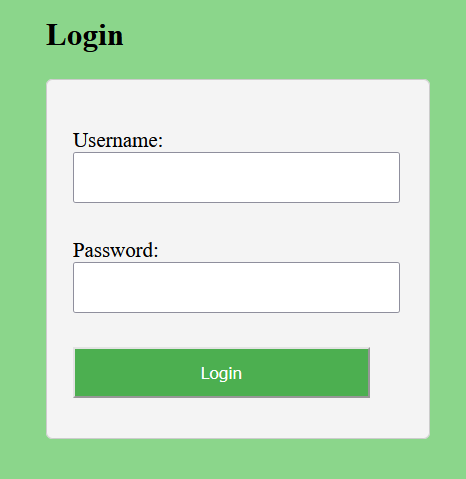

### **Пример пользовательской авторизационной формы (с возможностью авторизовываться как по логину, так и по email) с кастомизацией**

Для того чтобы на одной форме осуществлять аутентификацию по электронной почте и логину, вы можете создать собственную форму аутентификации, которая будет использовать оба поля.

Вот пример того, как можно создать кастомную форму. Хорошой практикой бывает создание форм в отдельном файле **forms.py** создайте это файл приложении **myapp**:

```python
# myapp/forms.py
from django import forms
from django.contrib.auth.forms import AuthenticationForm
from django.contrib.auth import authenticate
from django.core.exceptions import ValidationError
from django.core.validators import validate_email
from django.contrib.auth.models import User


class EmailOrUsernameAuthenticationForm(AuthenticationForm):
    # Создание поля для обработки как email, так как login
    email_or_username = forms.CharField(label="Email или логин", widget=forms.TextInput(attrs={'autofocus': True}))

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        """Так как мы наследуемся от авторизационной формы, у неё по умолчанию
        есть поле username в которое необходимо обязательно передать логин,
        поэтому это поле переопределяется как скрытое и ставится флаг, что оно необязательное"""
        self.fields['username'] = forms.fields.CharField(widget=forms.widgets.HiddenInput, required=False)

    def clean(self):
        email_or_username = self.cleaned_data.get('email_or_username')
        password = self.cleaned_data.get('password')

        if email_or_username and password:
            try:
                # Проверяем, является ли email_or_username действительным email-адресом
                validate_email(email_or_username)
                is_email = True
            except ValidationError:
                is_email = False
            # В Django нет встроенной аутентификации по email, поэтому обращаемся к базе данных за пользователем по email
            # и получаем от него username. Есть ещё способ сделать свою аутентификацию, но об этом позже
            if is_email:
                user = User.objects.filter(email=email_or_username).first()
                if user:
                    username = user.username
            else:
                username = email_or_username

            # Пробуем аутентифицировать пользователя
            user = authenticate(self.request, username=username, password=password)

            if user is None:
                raise ValidationError("Неправильные учетные данные.")

            # Используем данный атрибут, чтобы сохранить пользователя в объекте нашей формы(данный подход реализован внутри clean любой формы авторизации Django)
            self.user_cache = user

            # Возвращаем данные, если аутентификация успешна
            return self.cleaned_data
        else:
            raise ValidationError("Оба поля обязательны.")
```



`self.fields['username'] = forms.fields.CharField(widget=forms.widgets.HiddenInput, required=False)`

Если брать за основу предыдущий пример, то можно просто переписать **views.py** и **login.html** и всё будет работать

```python
# myapp/views.py
from django.shortcuts import render, redirect
from django.contrib.auth import authenticate, login
from .forms import EmailOrUsernameAuthenticationForm

def login_view(request):
    if request.method == 'POST':
        form = EmailOrUsernameAuthenticationForm(request, data=request.POST)
        if form.is_valid():
            user = form.get_user()
            login(request, user)
            return redirect('/')  # Перенаправление на домашнюю страницу
    else:
        form = EmailOrUsernameAuthenticationForm()
    return render(request, 'myapp/login.html', {'form': form})
```

Если оставить всё как есть, не трогая форму HTML, то получим

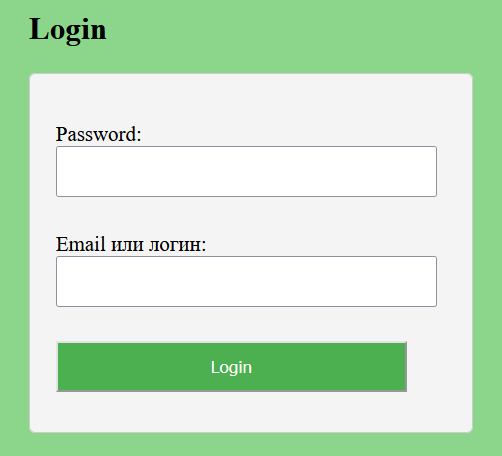

Строки поменяны местами. Это можно исправить или переопределив последовательно нужные строки в форме или поправив `login.html`

```html
<!-- myapp/templates/myapp/login.html -->
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Login</title>
    <link rel="stylesheet" href="{% static 'myapp/styles.css' %}">
</head>
<body>

  <div class="login-container">
    <h2>Login</h2>
    <form method="post" action="{% url 'login' %}" class="my-form">
      {% csrf_token %}
      {{ form.email_or_username.label_tag }}
      {{ form.email_or_username }}
      <br>
      {{ form.password.label_tag }}
      {{ form.password }}
      <br>

      {% if form.errors %}
        <div class="error-message">
          {{ form.non_field_errors.as_text }}
          {{ form.email_or_username.errors.as_text }}
          {{ form.password.errors.as_text }}
        </div>
      {% endif %}
      <input type="submit" value="Login">
    </form>
  </div>

</body>
</html>
```

Теперь можно авторизовываться как по логину, так и по email

Так же было добавлено в HTML

```html
{% if form.errors %}
  <div class="error-message">
    {{ form.non_field_errors.as_text }}
    {{ form.email_or_username.errors.as_text }}
    {{ form.password.errors.as_text }}
  </div>
{% endif %}
```

Это было сделано, чтобы можно было отобразить ошибки в форме. Вы можете воспользоваться специальным тегом Django **{{ form.errors }}** и методом **{{ form.non_field_errors }}**. Вместе они позволяют отображать все ошибки, связанные с формой, а также ошибки, не связанные с конкретным полем.

Пример ошибки

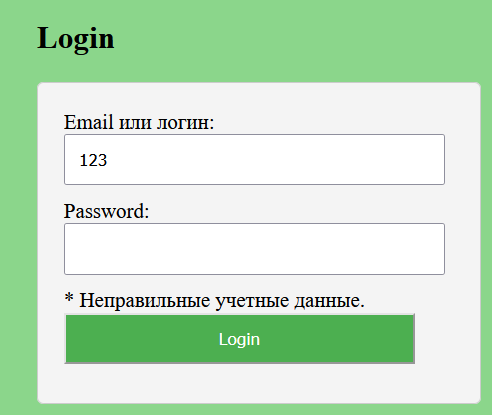

## **Сторонние приложения для создания форм**

https://django-crispy-forms.readthedocs.io/en/latest/

**Django Crispy Forms** – это приложение Django, которое облегчает управление формами в Django шаблонах, позволяя разработчикам создавать красивые и удобные формы с минимальными усилиями. Оно предоставляет набор тегов шаблонов и фильтров, которые позволяют изменять внешний вид и структуру форм Django без необходимости писать много шаблонного кода или CSS.

Чтобы использовать Django Crispy Forms в ваших шаблонах Django, вам сначала нужно установить приложение. Это можно сделать с помощью pip:

```
pip install django-crispy-forms
```

После установки добавьте 'crispy_forms' в INSTALLED_APPS в вашем файле settings.py:

```python

INSTALLED_APPS = [
    ...
    'crispy_forms',
]
```

Также, вы можете установить фреймворк стилей, который вы хотите использовать с Crispy Forms. Например, для Bootstrap 4 добавьте следующую строку в settings.py:

https://pypi.org/project/crispy-bootstrap4/

```pip install crispy-bootstrap4```

Затем в settings.py в INSTALLED_APPS добавим

```python
    INSTALLED_APPS = [
    ...
    'crispy_forms',
    "crispy_bootstrap4",
]
    
```

В settings.py добавим

```python
CRISPY_TEMPLATE_PACK = 'bootstrap4'
```

Теперь вы можете использовать Crispy Forms в ваших шаблонах. Вот как можно это сделать:

Загрузите теги Crispy Forms в начале вашего шаблона:

```html
{% load crispy_forms_tags %}
```

Используйте тег {% crispy %} для отображения формы:

```html
{% crispy form %}
```

## **Сторонняя авторизация через Github**

Для реализации сторонней авторизации через GitHub для Django приложения, можно использовать библиотеку **social-auth-app-django**. Ниже приведен общий алгоритм действий:

**1. Установите библиотеку social-auth-app-django:**

`pip install social-auth-app-django`

**2. Настройка приложения в GitHub:**

* Зайдите в свой аккаунт на GitHub и перейдите в "Settings".

* В разделе "Developer settings", выберите "OAuth Apps" и создайте новое приложение.

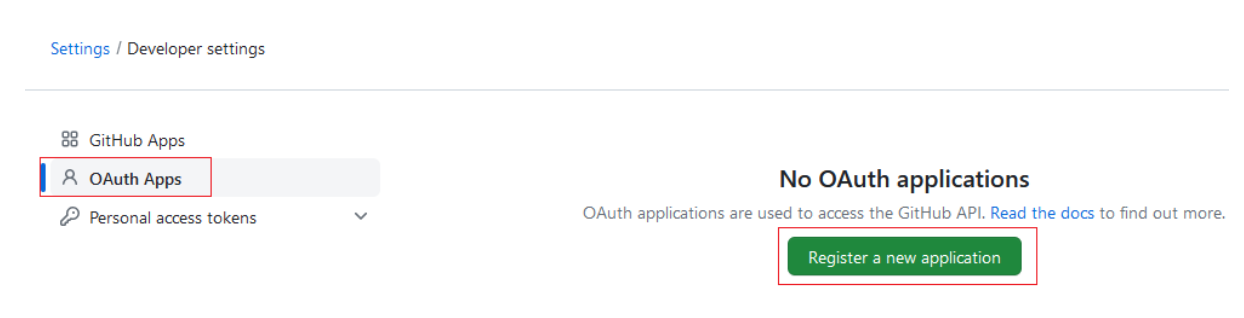

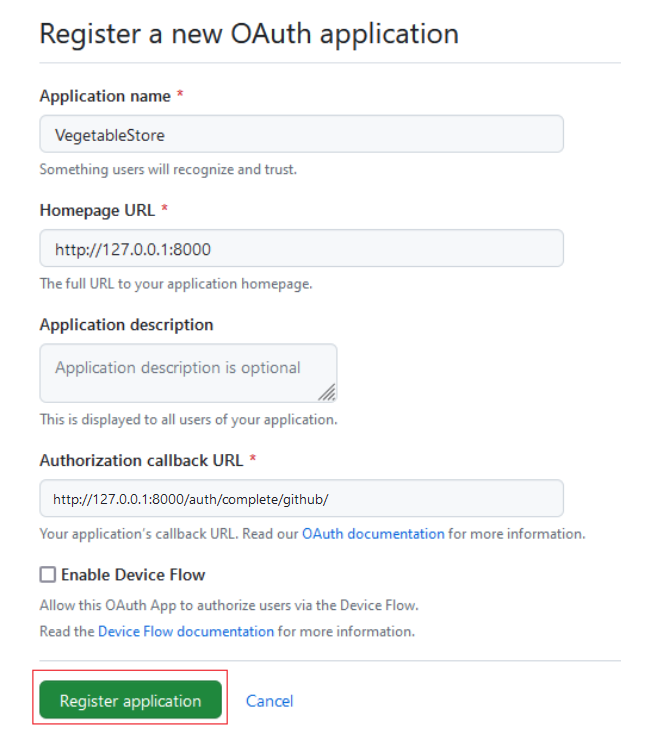

* Запомните Client ID и Client Secret, которые вам предоставит GitHub.

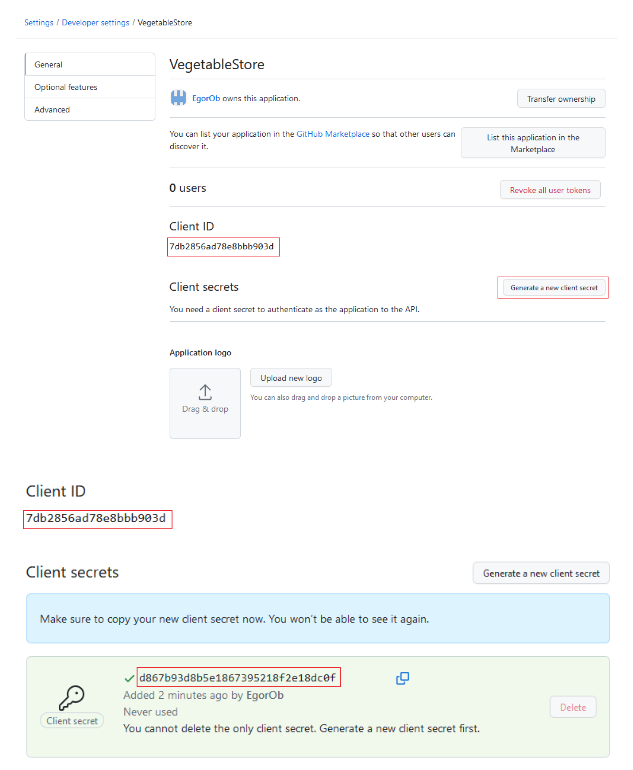

**3. Настройка Django проекта:**

* Добавьте **'social_django'** в **INSTALLED_APPS** в вашем **settings.py**.

* Пропишите **'social_django.context_processors.backends'** и **'social_django.context_processors.login_redirect'** в **context_processors** в **TEMPLATES** в **settings.py**.

* В **AUTHENTICATION_BACKENDS** добавьте **'social_core.backends.github.GithubOAuth2'**.

* Пропишите **SOCIAL_AUTH_GITHUB_KEY** и **SOCIAL_AUTH_GITHUB_SECRET** в **settings.py**, используя **Client ID** и **Client Secret**, полученные на GitHub.

```python
# settings.py

LOGIN_REDIRECT_URL = '/' # Чтобы после авторизации перенаправлялось на стартовую страницу

INSTALLED_APPS = [
    # ...
    'social_django',
]

TEMPLATES = [
    {
        # ...
        'OPTIONS': {
            'context_processors': [
                # ...
                'social_django.context_processors.backends',
                'social_django.context_processors.login_redirect',
            ],
        },
    },
]

AUTHENTICATION_BACKENDS = (
    # ...
    'social_core.backends.github.GithubOAuth2',
)

SOCIAL_AUTH_GITHUB_KEY = 'ваш Client ID'
SOCIAL_AUTH_GITHUB_SECRET = 'ваш Client Secret'
```

```

**4. URL маршруты:**

Добавьте URL маршруты для обработки авторизации. Можете использовать встроенные представления от social_django:

```python
# urls.py

from django.urls import path, include

urlpatterns = [
    # ...
    path('auth/', include('social_django.urls', namespace='social')),
]
```

**5. Шаблоны:**

Создайте шаблон, где пользователи будут видеть ссылку на GitHub для входа:

```html
<!-- login.html -->

<a href="{% url 'social:begin' 'github' %}">Войти с помощью GitHub</a>
```

**6. Обработка Callback:**

Убедитесь, что у вас есть URL-маршрут для обработки callback от GitHub. Это URL, который вы указали при регистрации приложения на GitHub.

**7. Произведите миграцию**

```python
python manage.py migrate
```